## Anomaly Detection Made Easy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

from pathlib import Path

In [4]:
df_1 = pd.read_csv("heart_disease_uci.csv")
df_1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df_1.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df_1.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<Axes: ylabel='chol'>

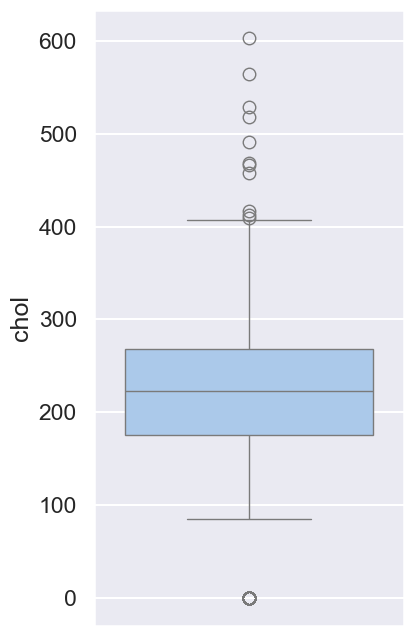

In [7]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

In [8]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [9]:
out_iqr(df_1,'chol')


The IQR is nan
The lower bound value is nan
The upper bound value is nan
Total number of outliers are 0


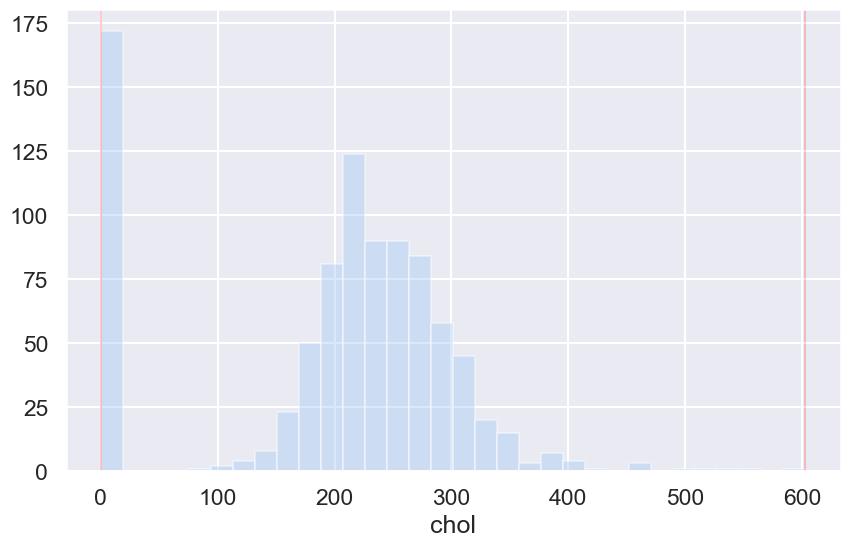

In [10]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

In [11]:
#Data Frame without outliers
df_new = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

In [12]:
df = pd.read_csv('heart_disease_uci.csv')

# Map categorical values to numerical codes
sex_mapping = {'Male': 1, 'Female': 0}
cp_mapping = {
    'typical angina': 3, 
    'atypical angina': 2, 
    'non-anginal': 1, 
    'asymptomatic': 0
}
restecg_mapping = {'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2}
slope_mapping = {'upsloping': 2, 'flat': 1, 'downsloping': 0}
thal_mapping = {'normal': 1, 'fixed defect': 2, 'reversable defect': 3}

# Apply the mappings to the relevant columns
df['sex'] = df['sex'].map(sex_mapping)
df['cp'] = df['cp'].map(cp_mapping)
df['restecg'] = df['restecg'].map(restecg_mapping)
df['slope'] = df['slope'].map(slope_mapping)
df['thal'] = df['thal'].map(thal_mapping)

# Rename the columns
df.rename(columns={'thalch': 'thalach', 'num': 'target'}, inplace=True)

# Drop the unnecessary columns
df = df.drop(columns=['id', 'dataset'])

# Save the transformed data to a new CSV file
df.to_csv('heart.csv', index=False)

In [13]:
df_1 = pd.read_csv("heart.csv")
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,True,1.0,150.0,False,2.3,0.0,0.0,2.0,0
1,67,1,0,160.0,286.0,False,1.0,108.0,True,1.5,1.0,3.0,1.0,2
2,67,1,0,120.0,229.0,False,1.0,129.0,True,2.6,1.0,2.0,3.0,1
3,37,1,1,130.0,250.0,False,0.0,187.0,False,3.5,0.0,0.0,1.0,0
4,41,0,2,130.0,204.0,False,1.0,172.0,False,1.4,2.0,0.0,1.0,0


In [14]:
df_1.isnull().sum()


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [15]:
df_1.describe()


,age,sex,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,918.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,0.750000,132.132404,199.130337,0.594771,137.545665,0.878788,1.229133,0.676375,1.990783,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.794786,25.926276,1.091226,0.619256,0.935653,0.946567,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,175.000000,0.000000,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,140.000000,0.500000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,1.000000,140.000000,268.000000,1.000000,157.000000,1.500000,2.000000,1.000000,3.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,2.000000,202.000000,6.200000,2.000000,3.000000,3.000000,4.000000


<Axes: ylabel='chol'>

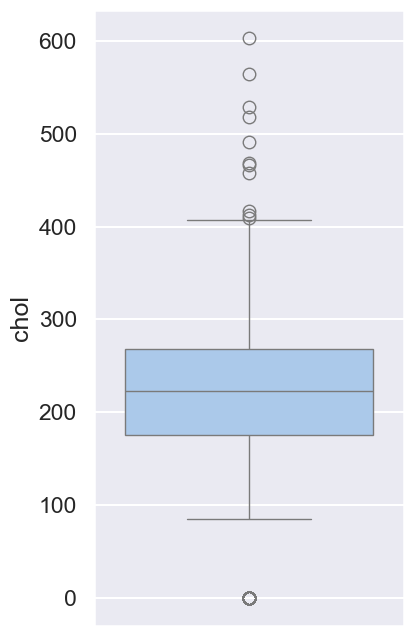

In [16]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

In [17]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [19]:
out_iqr(df_1,'chol')


The IQR is nan
The lower bound value is nan
The upper bound value is nan
Total number of outliers are 0


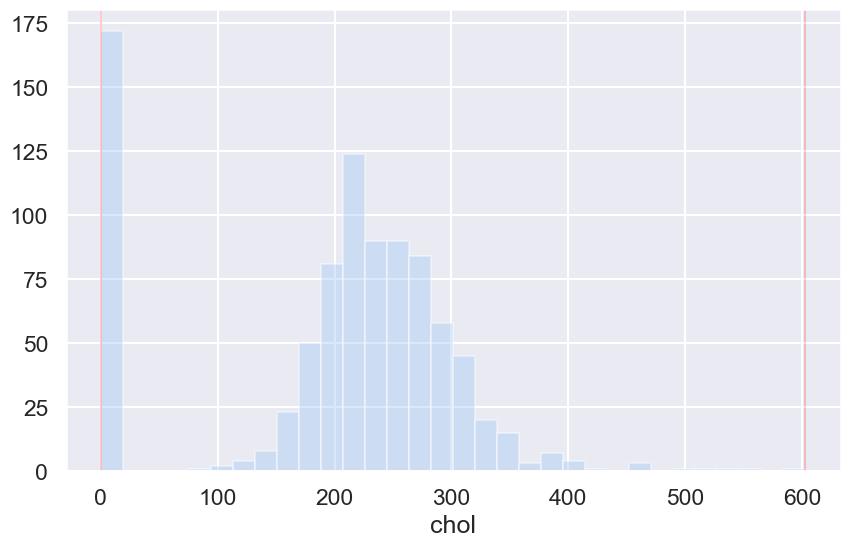

In [20]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

In [21]:
df_new = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

In [22]:
df_2 = pd.read_csv("StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='writing score', ylabel='Density'>

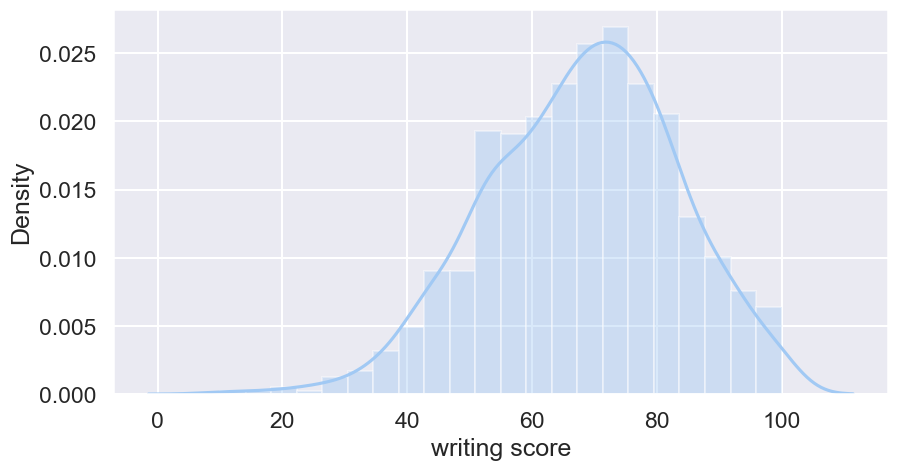

In [23]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'])

In [24]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [25]:
out_std(df_2,'writing score')


The lower bound value is 22.46702896739105
The upper bound value is 113.64097103260895
Total number of outliers are 4


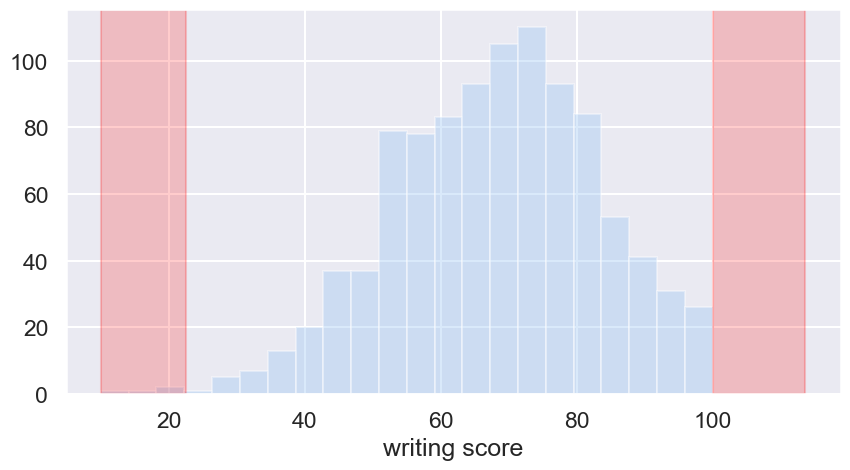

In [26]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df_2['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_2['writing score'].max(),alpha=0.2, color='red')

In [27]:
df_new = df_2[(df_2['writing score'] < upper) | (df_2['writing score'] > lower)]

In [28]:
df_3 = pd.read_csv("insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df_3.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
df_3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='charges', ylabel='Density'>

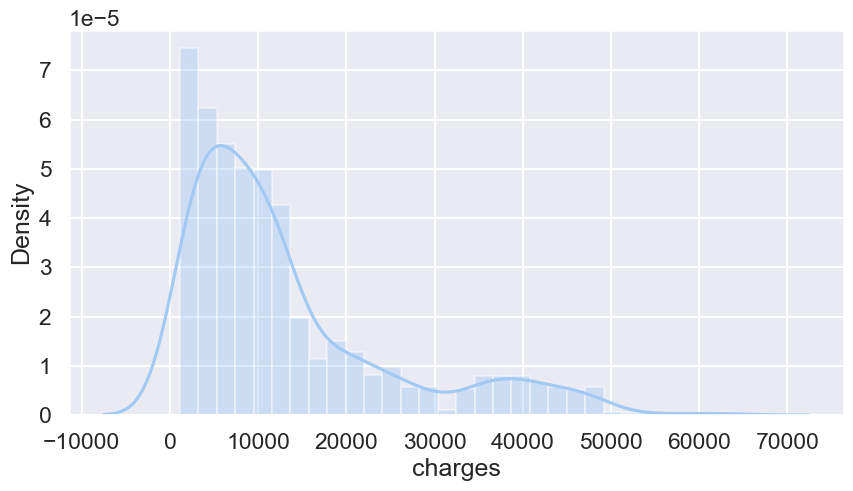

In [31]:
plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'])

In [32]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [33]:
out_zscore(df_3.charges)


Total number of outliers are 7


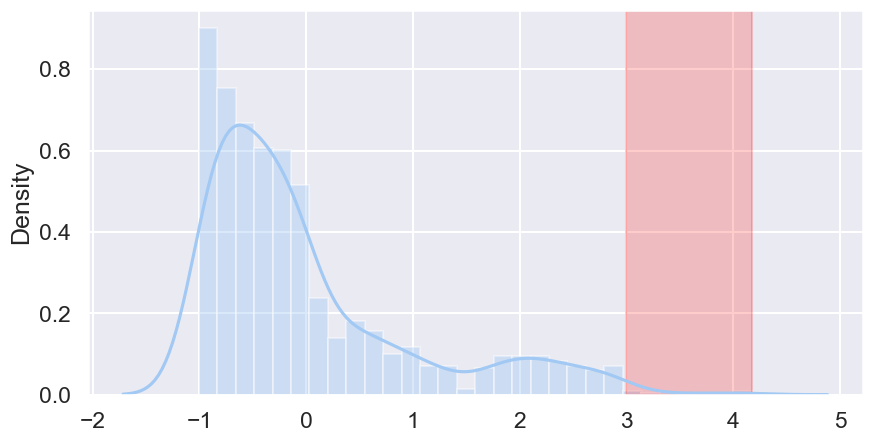

In [34]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

In [36]:
df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

In [37]:
df_new.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df_new.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Isolation Forrest

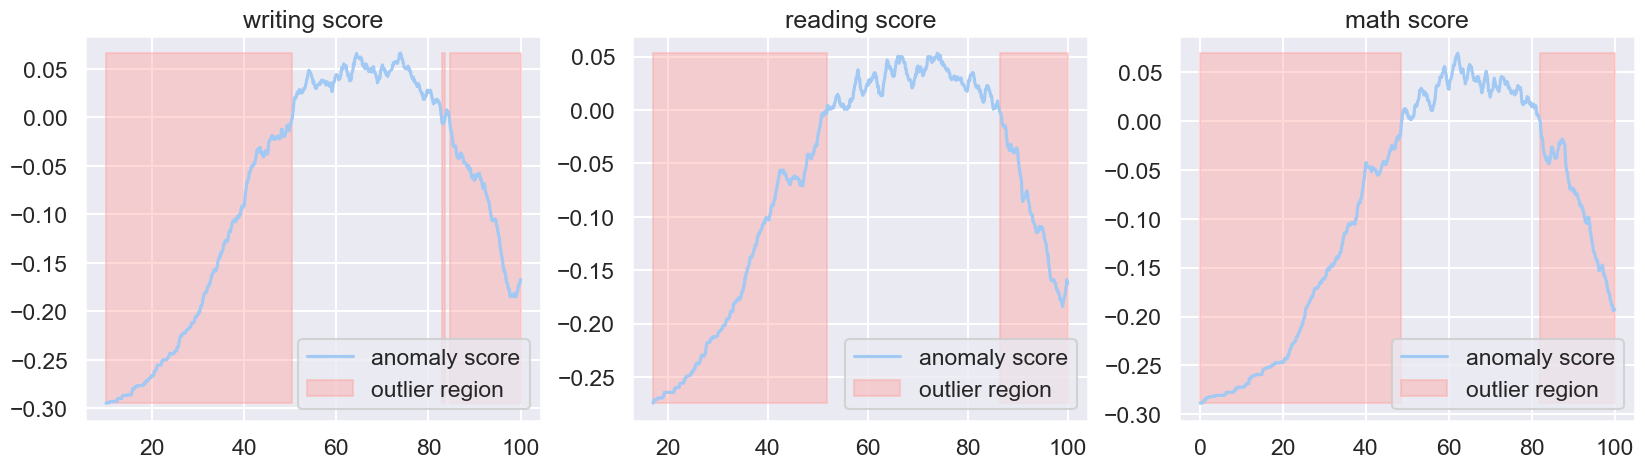

In [39]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['writing score','reading score','math score']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df_2[column].values.reshape(-1,1))

    xx = np.linspace(df_2[column].min(), df_2[column].max(), len(df_2)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)